<a href="https://colab.research.google.com/github/utpalrtw/Skillhigh/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Customer Segmentation**

Importing Lib

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [35]:
df = pd.read_csv("shopping_behavior_updated.csv")

####EDA

In [36]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [38]:
df.shape

(3900, 18)

In [39]:
#check for Null value
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [40]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [42]:
features = df.columns.drop('Customer ID')

In [43]:
features

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [44]:
for col in features:  #find unique value in every feature
  print(f'{col} has {df[col].nunique()} unique values: \n', df[col].sort_values().unique(), '\n')

Age has 53 unique values: 
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70] 

Gender has 2 unique values: 
 ['Female' 'Male'] 

Item Purchased has 25 unique values: 
 ['Backpack' 'Belt' 'Blouse' 'Boots' 'Coat' 'Dress' 'Gloves' 'Handbag'
 'Hat' 'Hoodie' 'Jacket' 'Jeans' 'Jewelry' 'Pants' 'Sandals' 'Scarf'
 'Shirt' 'Shoes' 'Shorts' 'Skirt' 'Sneakers' 'Socks' 'Sunglasses'
 'Sweater' 'T-shirt'] 

Category has 4 unique values: 
 ['Accessories' 'Clothing' 'Footwear' 'Outerwear'] 

Purchase Amount (USD) has 81 unique values: 
 [ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100] 

Location has 50 unique valu

In [45]:
# Convert wrong datatype into correct datatype
df['Customer ID'] = df['Customer ID'].astype(str)

In [46]:
df.duplicated().sum() #Duplicate data

np.int64(0)

### Build Model

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
num_features = ['Age', 'Purchase Amount (USD)', 'Review Rating',
                'Previous Purchases']

cat_features = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size',
                'Color', 'Season', 'Subscription Status', 'Shipping Type',
                'Discount Applied', 'Promo Code Used', 'Payment Method']


In [49]:
freq_map = {
    "Weekly": 7,           # 7 purchases per week (relative scale)
    "Bi-Weekly": 3.5,      # ~3.5 times per week
    "Fortnightly": 0.5,    # 1 every 2 weeks
    "Monthly": 0.25,       # 1 per month
    "Quarterly": 0.083,    # 1 per 3 months
    "Every 3 Months": 0.083, # same as Quarterly
    "Annually": 0.019      # 1 per year
}

df["Frequency of Purchases_num"] = df["Frequency of Purchases"].map(freq_map)


In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [51]:
kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                         ('cluster', KMeans(n_clusters=5, random_state=42))])

kmeans_labels = kmeans.fit_predict(df)

df['KMeans_Cluster'] = kmeans_labels
print("KMeans silhouette score:", silhouette_score(
    kmeans.named_steps['preprocessor'].transform(df),
    kmeans_labels
))


KMeans silhouette score: 0.05813698489357405


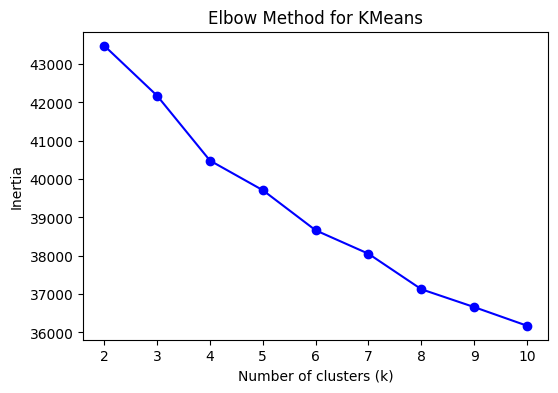

In [52]:
inertia = []
K = range(2, 11)  # test k=2 to 10

# Preprocess the data and assign to X
X = preprocessor.transform(df)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.show()

In [53]:
from sklearn.decomposition import PCA
import plotly.express as px

In [54]:
pca_full = PCA(n_components=10, random_state=42)   # you can tune n_components
X_pca_full = pca_full.fit_transform(X.toarray() if hasattr(X, "toarray") else X)

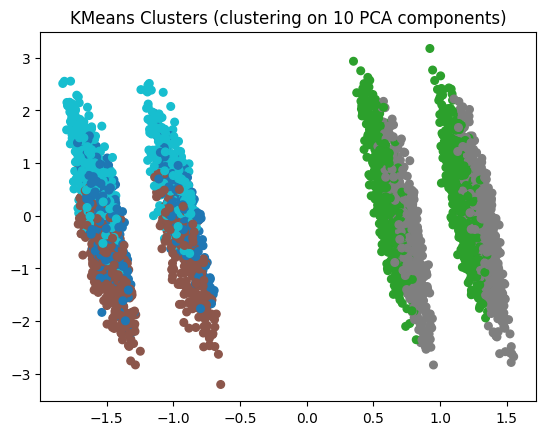

In [55]:
# Reduce to 2D for plotting
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_pca_full)

# Plot KMeans clusters
plt.scatter(X_vis[:,0], X_vis[:,1], c=kmeans_labels, cmap='tab10', s=30)
plt.title("KMeans Clusters (clustering on 10 PCA components)")
plt.show()



In [56]:
pca_vis3 = PCA(n_components=3, random_state=42)
X_vis3 = pca_vis3.fit_transform(X_pca_full)

# KMeans interactive 3D plot
fig = px.scatter_3d(x=X_vis3[:,0], y=X_vis3[:,1], z=X_vis3[:,2],
                    color=kmeans_labels.astype(str),
                    title="KMeans Clusters (3D PCA)",
                    labels={'x':'PCA 1','y':'PCA 2','z':'PCA 3'})
fig.show()

### data set Hase many column so, let's do some visualization to get insight

1. Customer Segmentation

* By Age Group: Segment customers into age groups to analyze how behavior varies by age.
* By Gender: Explore the difference in purchasing patterns between male and female customers.
* By Purchase Frequency: Analyze how often different customers purchase and segment them into groups like weekly, fortnightly, quarterly, etc.

In [57]:
# Age group bins
bins = [18, 25, 35, 45, 55, 65]

# Labels for age groups
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create new Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

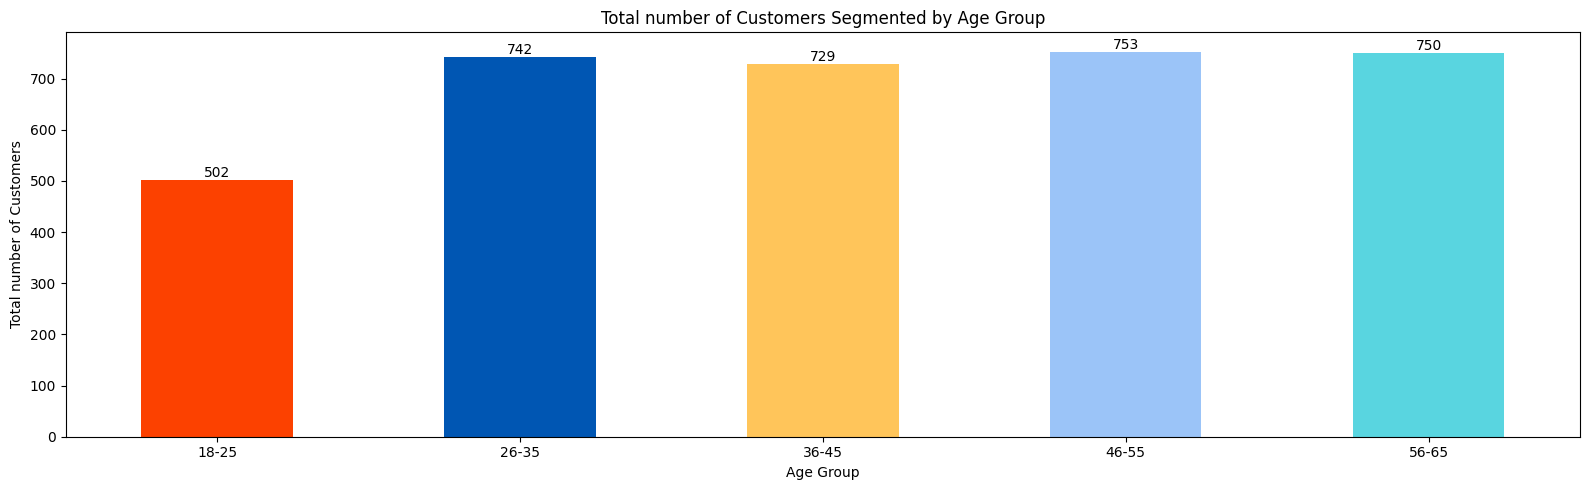

In [58]:
# Count total Customers by Age Group
total_customer_by_age_group = df['Age Group'].value_counts().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = total_customer_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

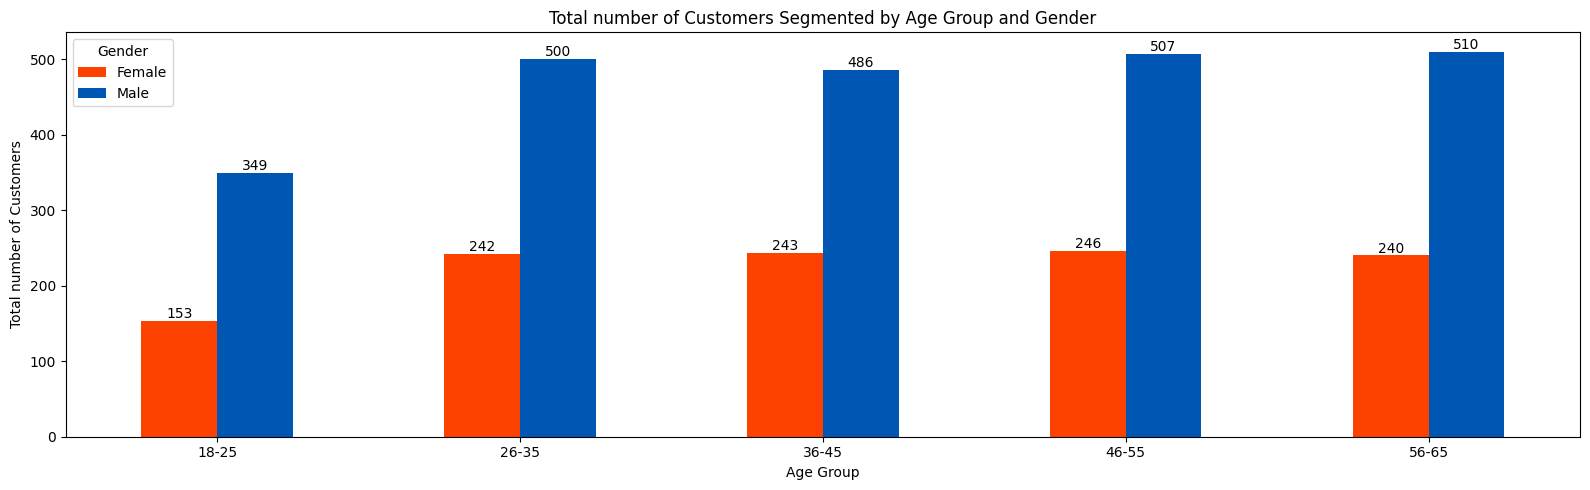

In [59]:
# Count total Customers by Age Group and Gender
total_customer_by_age_group_and_gender = df.groupby(['Age Group'])['Gender'].value_counts().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = total_customer_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Total number of Customers Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Total number of Customers')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

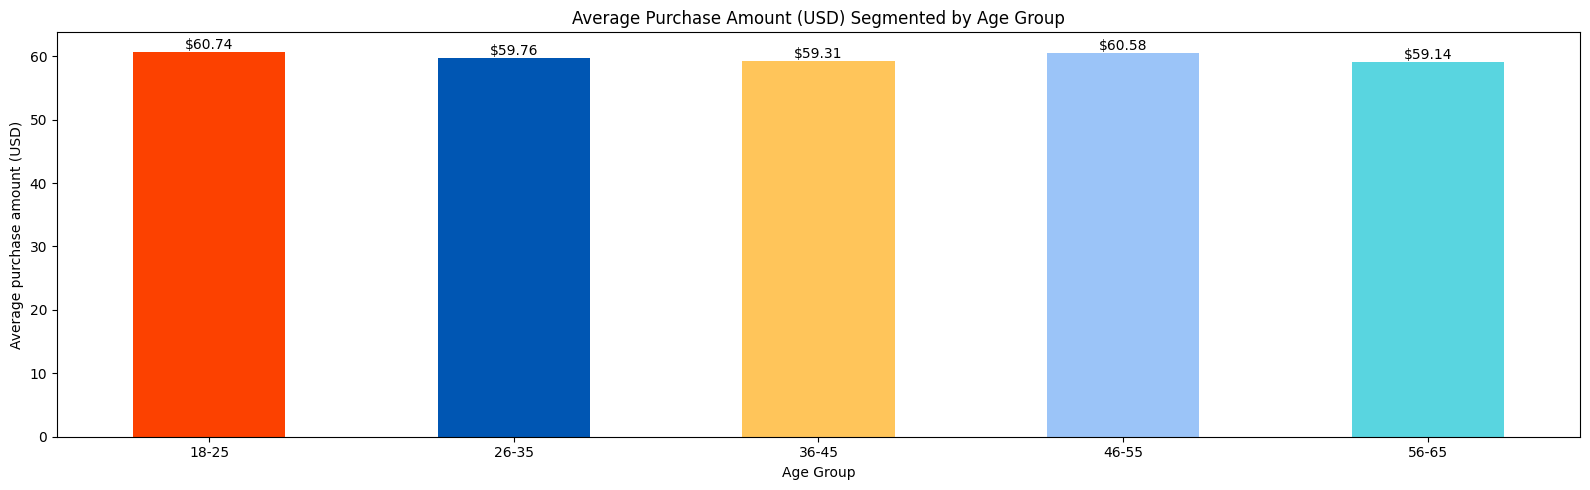

In [60]:
# Average Purchase Amount (USD) by Age Group
average_purchase_amount_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average purchase amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

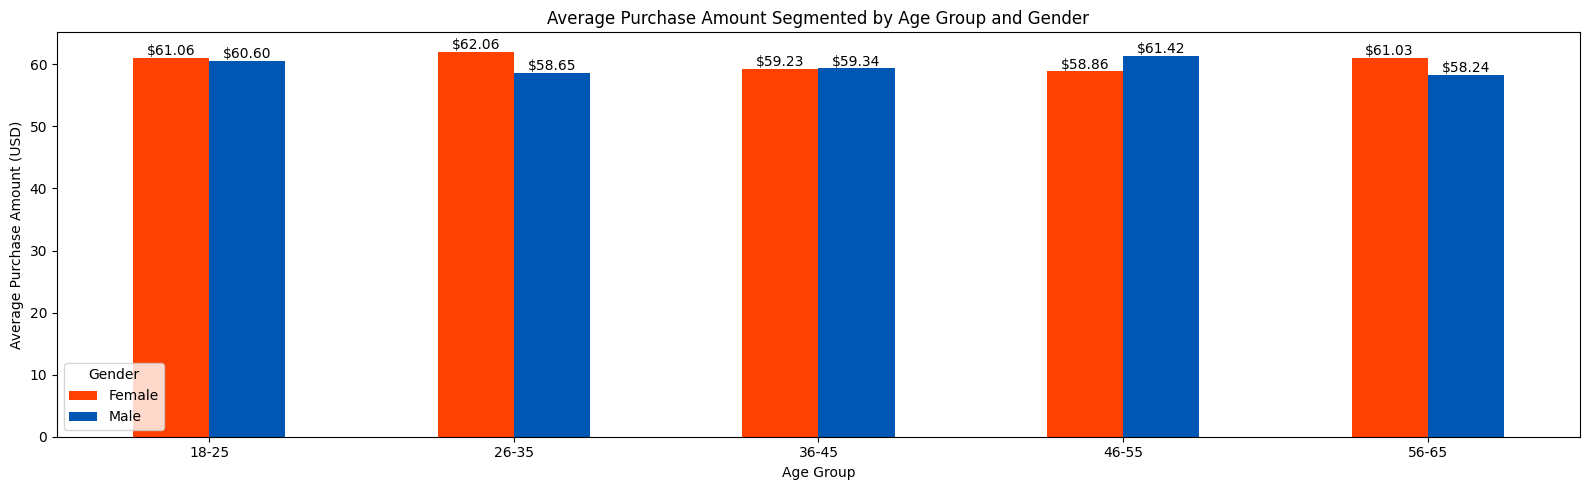

In [61]:
# Average Purchase Amount (USD) by Age Group and Gender
average_purchase_amount_by_age_group_and_gender = df.groupby(['Age Group', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_age_group_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

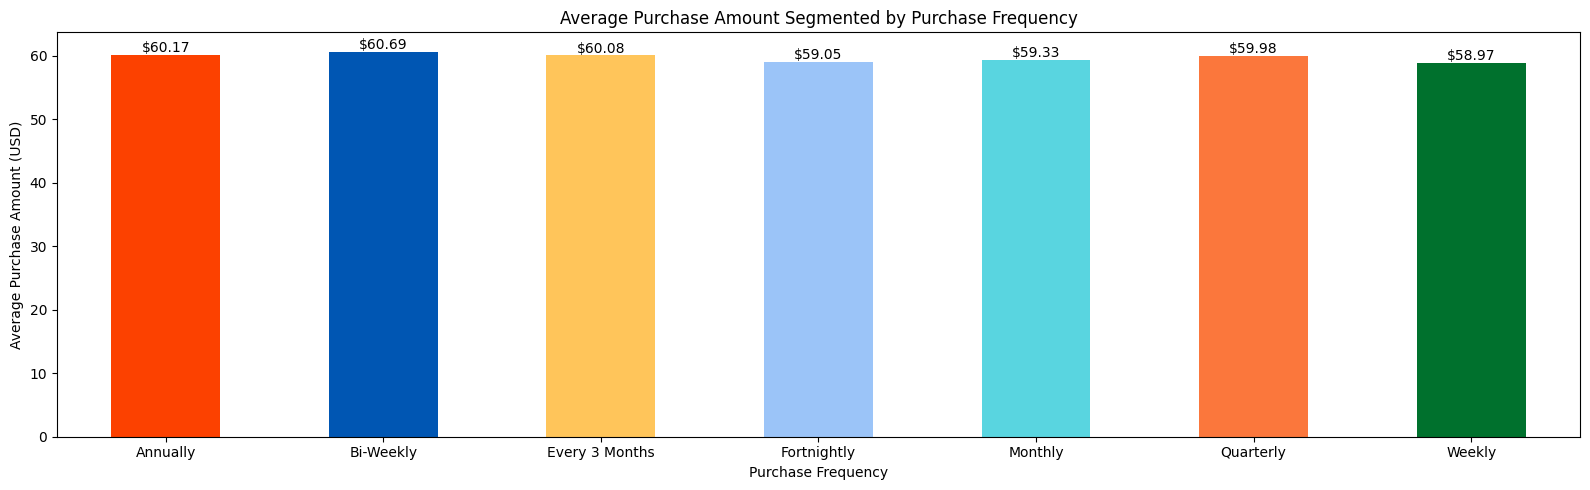

In [62]:
# Average Purchase Amount by Purchase Frequency
average_purchase_amount_by_purchase_fre = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount Segmented by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

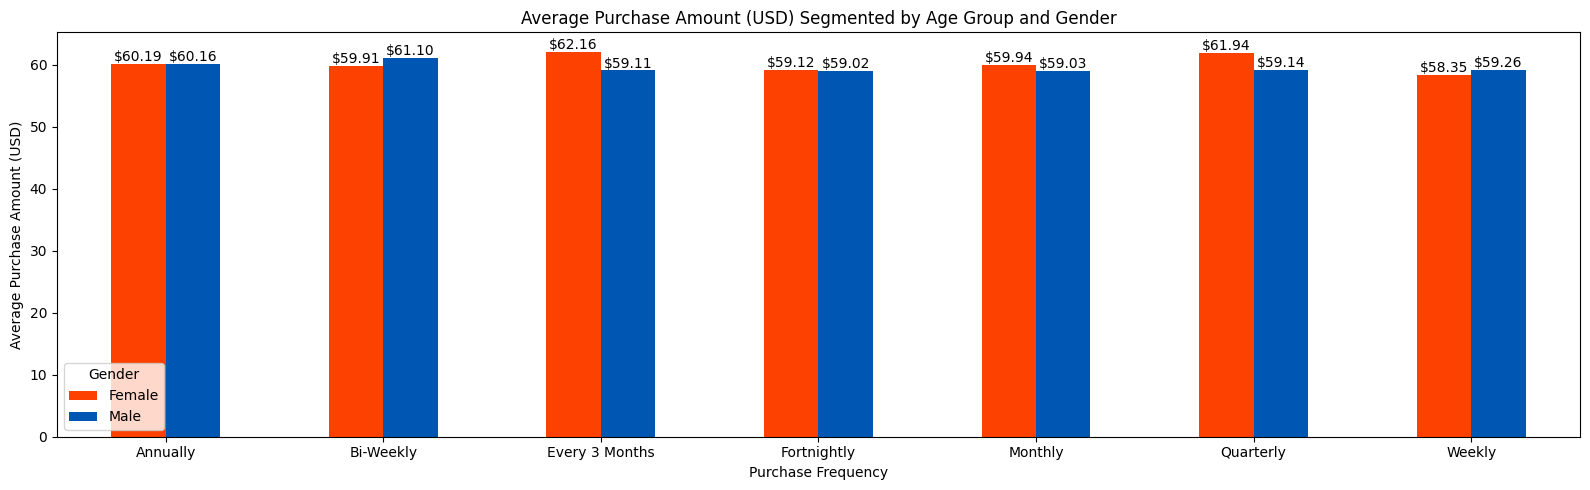

In [63]:
# Average Purchase Amount by Purchase Frequency and Gender
average_purchase_amount_by_purchase_fre_and_gender = df.groupby(['Frequency of Purchases', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
colors = ['#FC4100', '#0056B3']

# Plot the data as a bar chart
bars = average_purchase_amount_by_purchase_fre_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title
plt.title('Average Purchase Amount (USD) Segmented by Age Group and Gender')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average Purchase Amount (USD)')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:.2f}',
                 (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

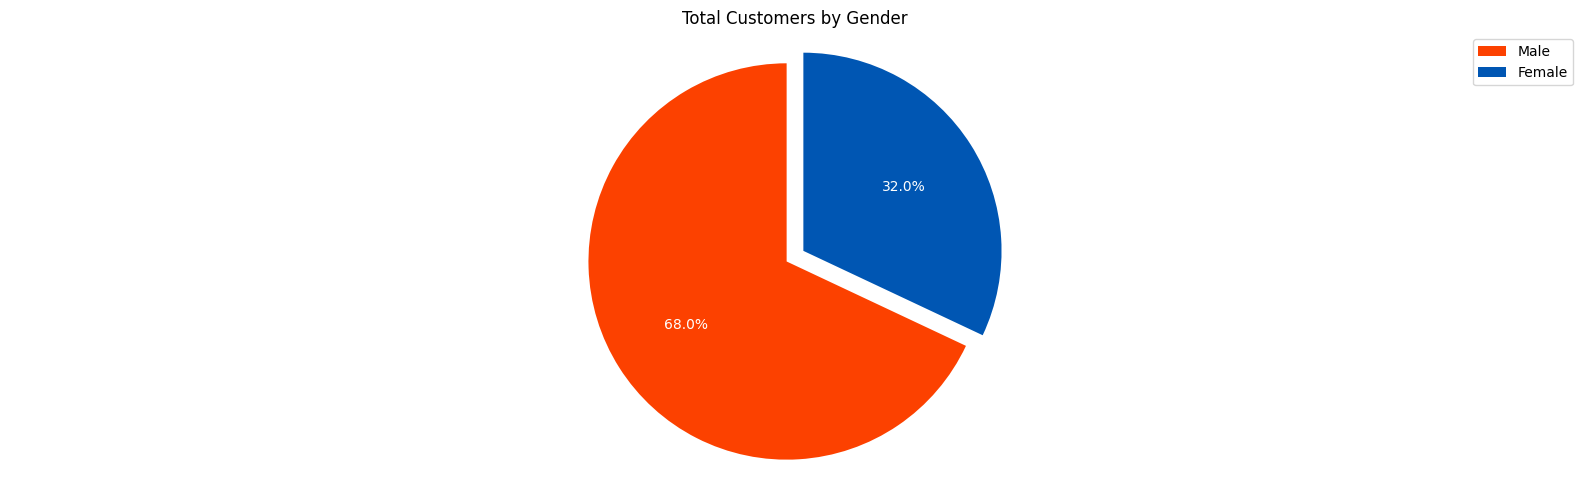

In [64]:
# Count total Customers by Gender
total_customers_by_gender = df['Gender'].value_counts()
colors = ['#FC4100', '#0056B3']

# Plot pie chart
plt.figure(figsize=(16, 5))
plt.pie(total_customers_by_gender,
        labels=total_customers_by_gender.index,
        colors=colors,
        explode=(0, 0.1),  # Explode second slice
        autopct='%1.1f%%',
        textprops={'color': '#ffffff'},
        startangle=90)

# Add title
plt.title('Total Customers by Gender')

# Add legend
plt.legend(labels=total_customers_by_gender.index, loc="best")

# Equal axis ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

 Purchase Trends

* By Category: Compare how much customers spend on different categories.
* By Item Purchased: Look at the popularity of different items such as Blouse, Sweater, Jeans, etc., to identify top sellers.

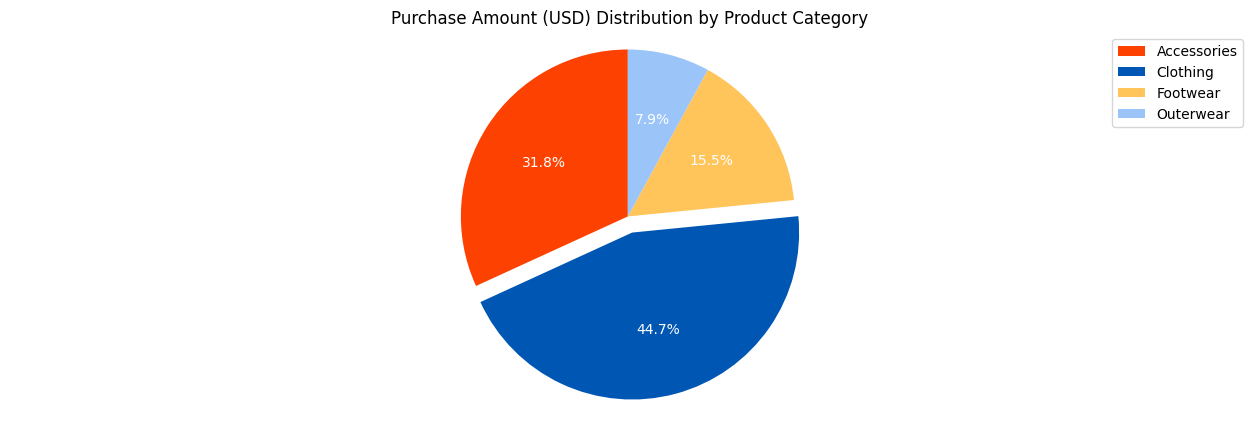

In [66]:
# Total Purchase Amount of Customer spends on different Product Categories
total_spend_by_categories = df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors=['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8']

# Plot data as a pie chart
plt.figure(figsize=(16, 5))
explode = [0.1 if i == total_spend_by_categories.idxmax() else 0 for i in total_spend_by_categories.index]

# Add datalabel into the pie chart
plt.pie(total_spend_by_categories,
        labels=total_spend_by_categories.index,
        autopct='%1.1f%%',
        explode=explode,
        textprops={'color': '#ffffff'},
        startangle=90,
        colors=colors)

# Add title
plt.title('Purchase Amount (USD) Distribution by Product Category')

# Add legend
plt.legend(labels=total_spend_by_categories.index, loc="best")

# Show the plot
plt.axis('equal')
plt.show()

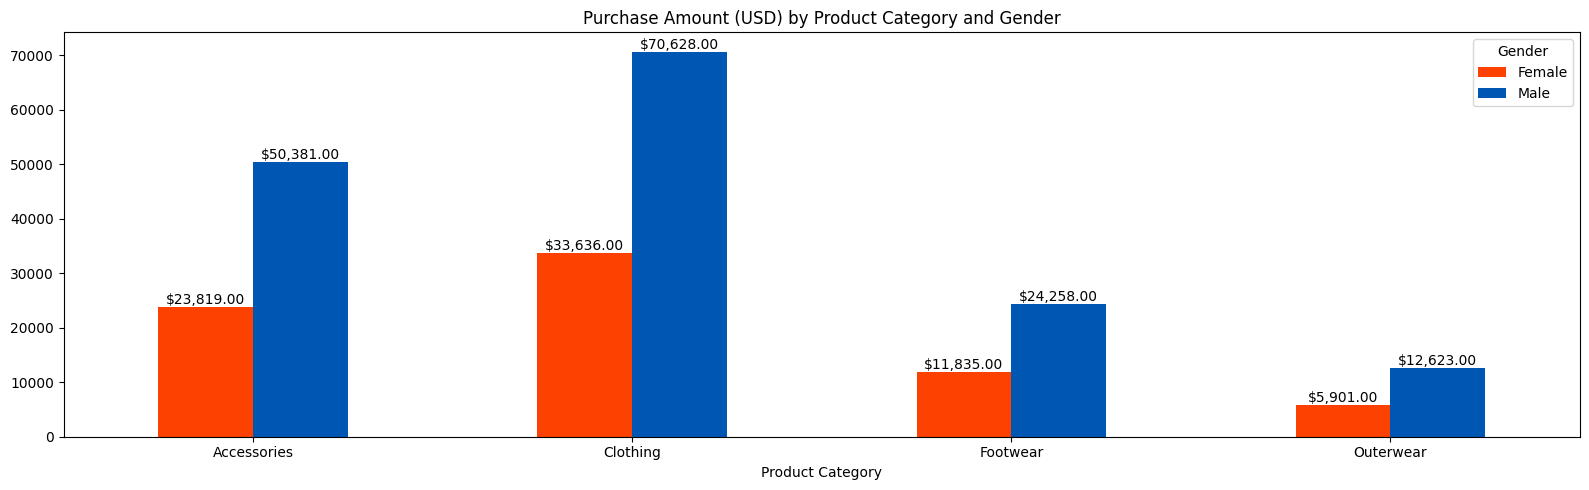

In [67]:
# Total Purchase Amount Customer spends by different Product Categories and Gender
total_spend_by_categories_and_gender = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].sum().unstack()
colors=['#FC4100', '#0056B3']

# Plot data as a bar chart
bars = total_spend_by_categories_and_gender.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Product Category and Gender')
plt.xlabel('Product Category')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

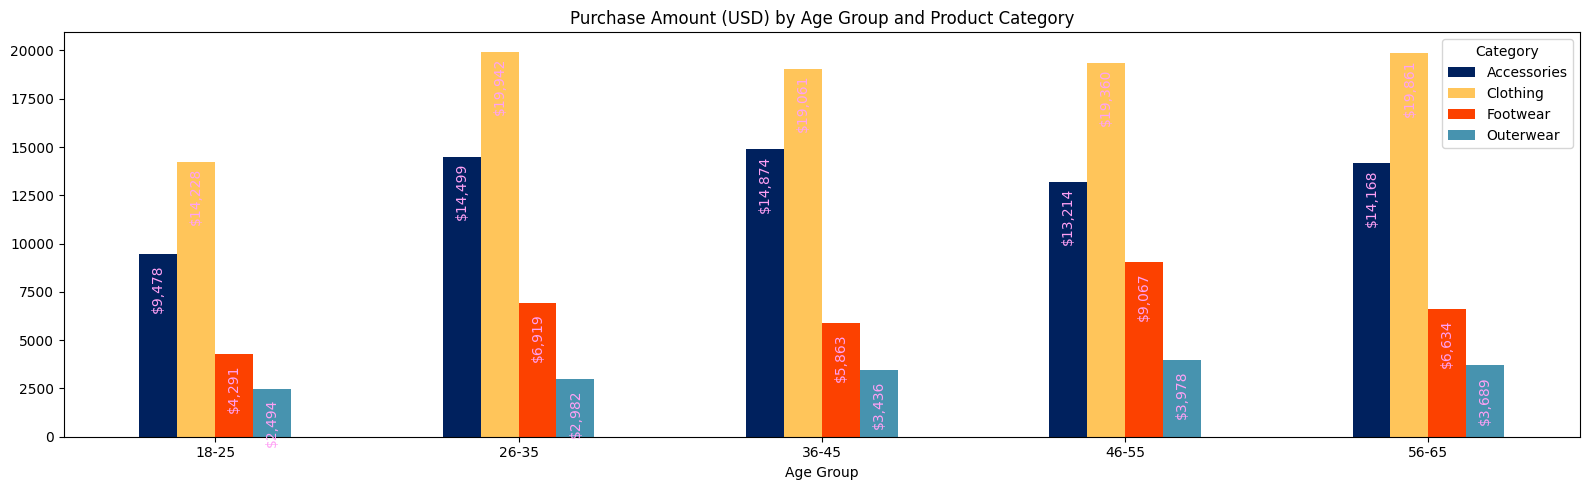

In [68]:
# Total Purchase Amount Customer spends by different Product Categories
total_spend_by_categories_and_age_group = df.groupby(['Age Group', 'Category'])['Purchase Amount (USD)'].sum().unstack()
colors = ['#00215E', '#FFC55A', '#FC4100', '#4793AF']

# Plot data as a bar chart
bars = total_spend_by_categories_and_age_group.plot(kind='bar', color=colors, figsize=(16, 5))

# Add titles and labels
plt.title('Purchase Amount (USD) by Age Group and Product Category')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')

# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.0f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  color='#FFA1F5',
                  textcoords='offset points',
                  xytext=(0, -25),
                  rotation=90)


# Show the plot
plt.tight_layout()
plt.show()

Object `products` not found.


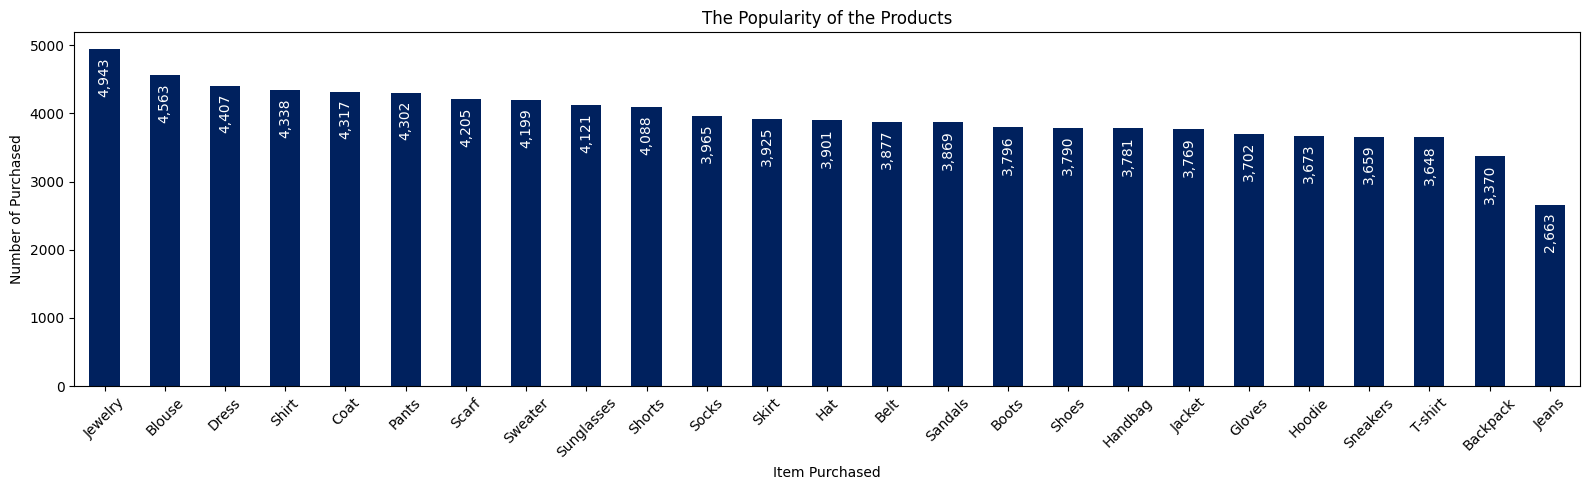

In [69]:
Q5: What are the most Popular products?

# Calculate total puchase number of the customer by Previous Purchase
total_purchase_by_previous_purchase = df.groupby(['Item Purchased'])['Previous Purchases'].sum().sort_values(ascending=False)
colors = ['#00215E']

# Plot the data as a bar chart
bars = total_purchase_by_previous_purchase.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('The Popularity of the Products')
plt.xlabel('Item Purchased')
plt.xticks(rotation=45)
plt.ylabel('Number of Purchased')


# Add data labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, -20),
                  color='#ffffff',
                  textcoords='offset points',
                  rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

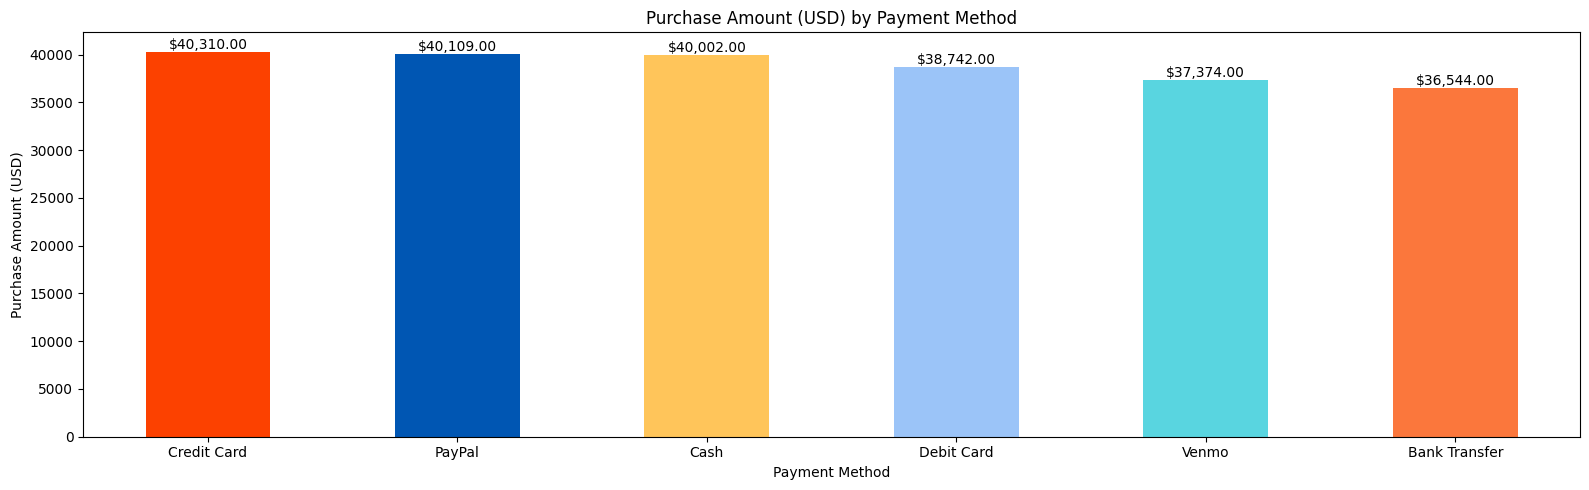

In [70]:
# Count the number of Payment Methods
count_payment_method = df.groupby(['Payment Method'])['Purchase Amount (USD)'].sum().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = count_payment_method.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Purchase Amount (USD) by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

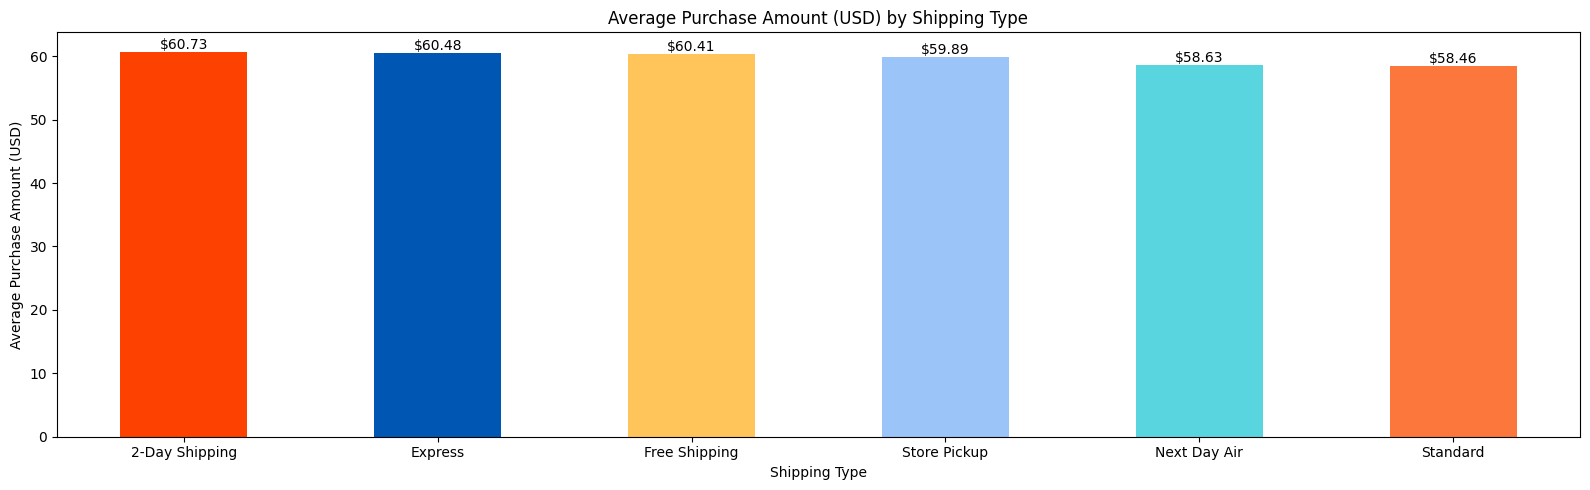

In [71]:
# Average Purchase Amount Vs Shipping Type
shipping_purchase_analysis = df.groupby(['Shipping Type'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = shipping_purchase_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Purchase Amount (USD) by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

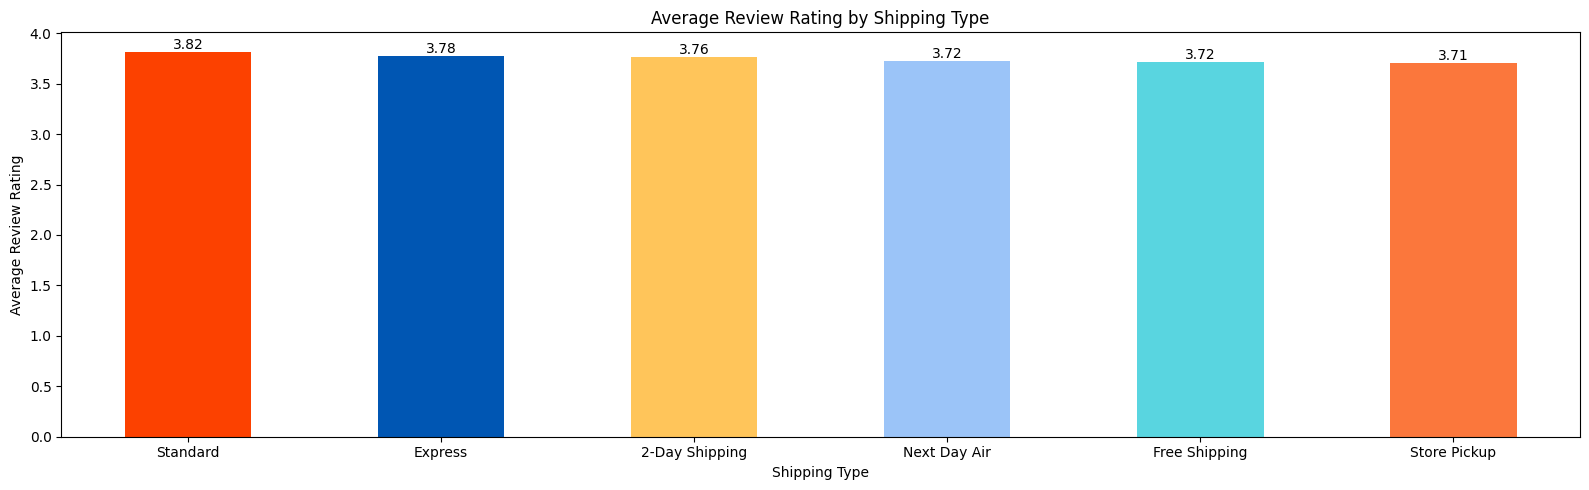

In [72]:
# Average Rating Vs Shipping Type
rating_purchase_analysis = df.groupby(['Shipping Type'])['Review Rating'].mean().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

# Plot the data as a bar chart
bars = rating_purchase_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Average Review Rating by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Review Rating')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

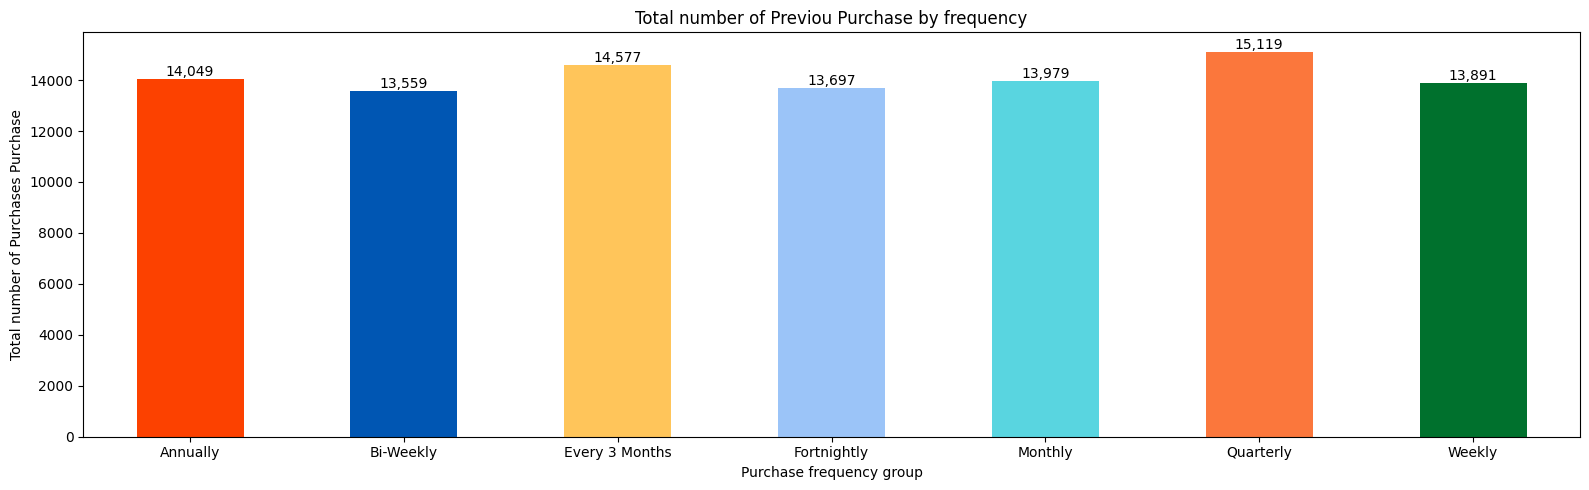

In [73]:
# Frequency of Purchase
frequency_of_purchase = df.groupby('Frequency of Purchases')['Previous Purchases'].sum().sort_index()
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C', '#00712D']

# Plot the data as a bar chart
bars = frequency_of_purchase.plot(kind='bar', color=colors, figsize=(16, 5))

# Add title and labels
plt.title('Total number of Previou Purchase by frequency')
plt.xlabel('Purchase frequency group')
plt.xticks(rotation=0)
plt.ylabel('Total number of Purchases Purchase')

# Add data labes on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

# Show the plot
plt.tight_layout()
plt.show()